In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import koala as kl
from koala.lattice import Lattice
from koala.example_graphs import single_plaquette

/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_53434/1170946964.py:24: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(lat,edge_labels= c, edge_arrows=True, ax = axes.flatten()[n])


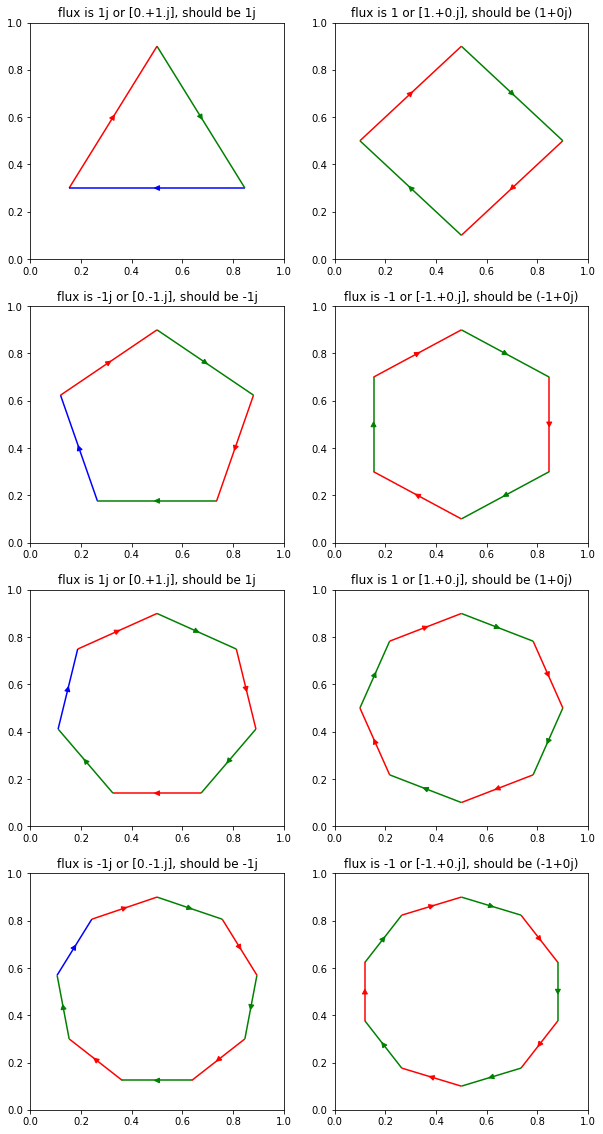

In [3]:
from matplotlib import pyplot as plt
from koala.graph_color import color_lattice
from koala import plotting as pl
from koala.flux_finder import fluxes_from_bonds

lattices = []

for n in range(3,11):
    lattices.append(single_plaquette(n))

n_lattices = len(lattices)

rows = int(np.ceil(n_lattices/2))
fig,axes = plt.subplots(rows, 2  ,figsize=  (10,10*rows/2))

for n, lat in enumerate(lattices):

    c = color_lattice(lat)
    ujk = np.full(lat.n_edges, 1)

    flux = fluxes_from_bonds(lat, ujk)
    flux_imag = fluxes_from_bonds(lat, ujk, False)

    pl.plot_lattice(lat,edge_labels= c, edge_arrows=True, ax = axes.flatten()[n])
    if lat.n_edges%2 == 0:
        j = ''
    else:
        j = 'j'

    axes.flatten()[n].set_title(f'flux is {flux[0]}' + j +  f' or {flux_imag}, should be {(-1j)**lat.n_edges}')


    

